<a href="https://colab.research.google.com/github/GabrielMacedoFrota/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_Sidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sydney*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Sydney, na Austrália e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram extraídos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial iremos usar apenas um arquivo:

* 'listings.csv' - *Summary information and metrics for listings in Sydney (good for visualisations)*



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv")

## Análise dos Dados

Antes de nos aprofundarmos, traremos à tona a situação geral dos dados, como eles estão dispostos e os campos que a série de dados possui.

**Dicionário das variáveis**

* `id` - Número de identificação gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de identificação gerado para o locador
* `host_name` - nome do locador
* `neighbourhood_group` - esta coluna não contem nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - latitude
* `longitude` - longitude
* `room_type` - tipo do quarto
* `price` - Preço
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de visitas no site para aquela propriedade
* `last_review` - Data da última visita no site para aquela propriedade
* `reviews_per_month` - Número de visitas no site por mês que a propriedade possui
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - quantidade de dias que o imóvel está disponível dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86917,151.22656,Private room,65,2,196,2020-03-13,1.48,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86515,151.19190,Private room,14315,2,526,2019-09-22,4.22,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80093,151.26172,Entire home/apt,470,5,2,2019-01-02,0.03,2,11
3,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,79,2,364,2020-03-17,3.46,1,323
4,36909,"Heritage Art Deco Flat, Walk to Bondi Beach",159252,Sky,NaN,Woollahra,-33.88719,151.26316,Entire home/apt,216,2,13,2018-08-01,0.21,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora vamos identificar o tamanho do nosso dataset e quais os tipos de variáveis que temos.

Cabe ressaltar que esse arquivo que nós estamos utilizando (`listings.csv`) é o arquivo mais resumido. Há um arquivo com muito mais dados e variáveis no [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 34276
variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A relação da quantidade de valores ausentes com a quantidade de entradas que o *dataset* possui nos dá uma noção inicial de quais variáveis são centrais e quais podem prejudicar uma futura análise dos dados.

* Podemos notar que a variável `neighbourhood_group` possui 100% dos seus valores ausentes.
* A variável `reviews_per_month` possui 28% dos seus dados ausentes, assim como `last_review`
* As variáveis `host_name` e `name` possuem, respectivamente, 7% e 3% dos dos seus valores ausentes

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False )

neighbourhood_group               1.000000
reviews_per_month                 0.280342
last_review                       0.280342
host_name                         0.000700
name                              0.000350
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Como as variáveis estão distribuídas?** 

Para identificar a distribuição das variáveis, irei plotar o histograma de cada uma delas.

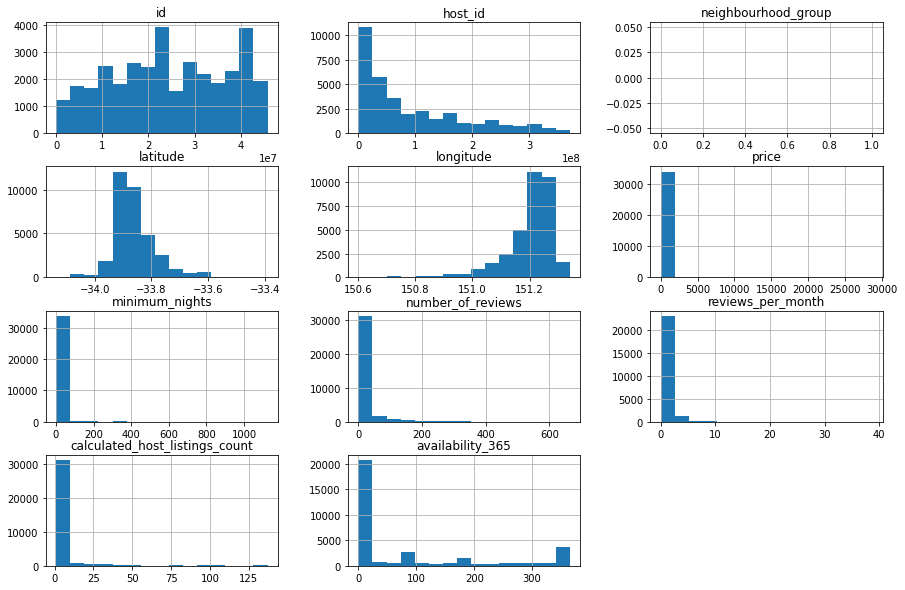

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15 , figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Antes de calcularmos a média, é preciso verificar a presença de outliers nas variáveis presentes, para que estas não distorçam o resultado. Repare que nos histogramas de `calculated_host_listings_count`, `minimum_nights` e `price` há valores que distorcem a distribuição dos gráficos, com valores muito distantes.

Para conferirmos a presença desses *outliers* podemos utilizar dois métodos:

* Resumo estatístico pelo método `describe()`
* Plotar `boxplots` para as variáveis

In [ ]:
# identificando os outliers
df[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()

,price,minimum_nights,calculated_host_listings_count
count,34276.000000,34276.000000,34276.000000
mean,208.082157,6.439491,5.900222
std,441.221011,32.607029,17.776260
min,5.000000,1.000000,1.000000
25%,70.000000,1.000000,1.000000
50%,119.000000,2.000000,1.000000
75%,200.000000,5.000000,2.000000
max,28613.000000,1125.000000,137.000000


Podemos notar que 75% dos valores de preço estão na faixa de 200, mas o valor máximo para esta variável é 28613. A média de preços está em 208.08.




price: valores acima de 1500:
296 entradas
0.8636%


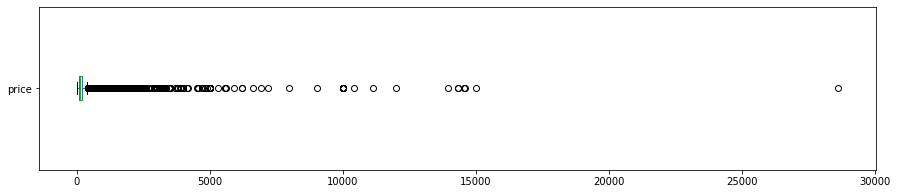

In [ ]:
# Plotando o bloxplot para price

df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show

# Valores acima de 400 dólares

print('\nprice: valores acima de 1500:')
print('{} entradas'.format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500])/df.shape[0])*100))


Agora plotaremos os histogramas sem os outliers

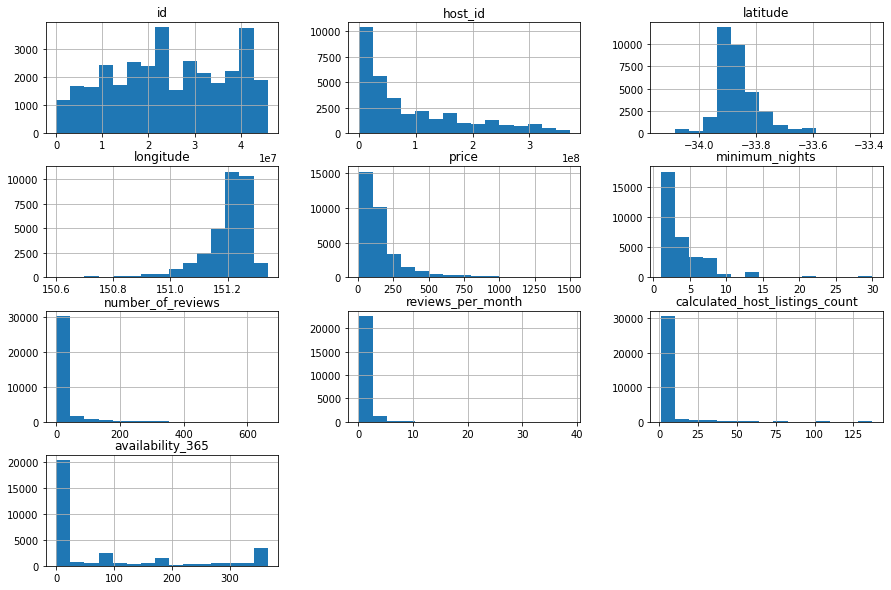

In [ ]:
# removendo os outliers do dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# excluindo a coluna "neighbourhood_group" pois está vazio

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar histograma para as variáveis numéricas

df_clean.hist(bins=15, figsize=(15,10));



### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas variáveis. Pode ser uma correlação positiva ou pode ser negativa. Não necessariamente a correlação indica uma relação de causa e efeito, mas podemos tirar alguns insights.

Para verificar a existência de uma correlação entre as variáveis farei duas coisas:

* criar uma matriz de correlação 
* Gerar um heatmap a partir dessa matriz utilizando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação

corr = df_clean[["price", "minimum_nights", "calculated_host_listings_count", 'longitude', 'latitude', 'reviews_per_month']].corr()

display(corr)

# mostrar a matriz de correlação


,price,minimum_nights,calculated_host_listings_count,longitude,latitude,reviews_per_month
price,1.000000,0.100010,0.171728,0.237236,0.208082,-0.069128
minimum_nights,0.100010,1.000000,0.013774,0.100143,-0.005602,-0.148053
calculated_host_listings_count,0.171728,0.013774,1.000000,0.034794,0.015621,0.031102
longitude,0.237236,0.100143,0.034794,1.000000,0.086939,-0.075675
latitude,0.208082,-0.005602,0.015621,0.086939,1.000000,0.044260
reviews_per_month,-0.069128,-0.148053,0.031102,-0.075675,0.044260,1.000000


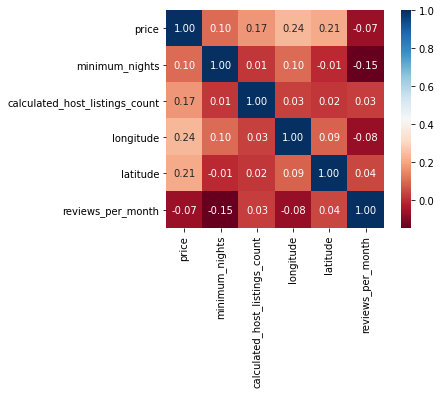

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

É interessante também analisar qual o tipo de imóvel que é mais alugado na região, o que pode nos dar alguns insights interessantes. Se você já alugou no airbnb sabe que no site eles dão as opções de casa/apartamento inteiros, quartos privativos ou quartos compartilhados. É sobre isso que a variável `room_type` diz.

Podemos ver a seguir que casas ou apartamentos inteiros são os tipos mais procurados, seguidos por quartos privativos.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19831
Private room       12621
Shared room          626
Hotel room           239
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.595222
Private room       0.378816
Shared room        0.018789
Hotel room         0.007174
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Sidney?**

Através do `groupby()` é possível analisarmos uma variável em função de outra. Nesse caso, vamos comparar os preços (`price`) com a localidade (`neighbourhoods`).

Podemos ver abaixo que o bairro Pittwater é o mais caro para se alugar no airbnb na cidade, com, em média, 447 dólares por noite, seguido pelos bairros de Mosmam e Manly.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Pittwater           447.415698
Mosman              357.398287
Manly               277.856079
Hunters Hill        270.600000
Warringah           259.448507
Woollahra           233.744727
Sutherland Shire    210.662698
Waverley            208.951433
Leichhardt          198.682898
Lane Cove           192.071186
Name: price, dtype: float64

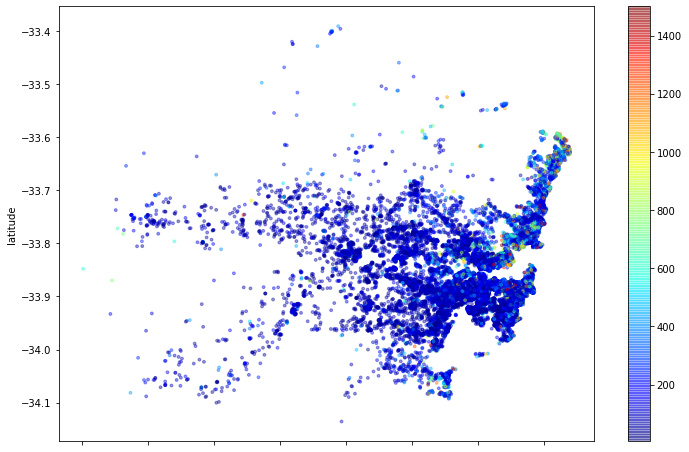

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

É possível notar pela distribuição geográfica dos preços mostrada acima, que a maior parte dos pontos mais caros (pontos em vermelho) se encontram mais próximos à costa.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média do mínimo de noites que os locatários permanecem nas residências na cidade é de aproximadamente 4 dias.

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean.minimum_nights.values.mean()

3.860101449710358

## Conclusões

Foi apenas uma abordagem superficial dos dados do Airbnb referentes à cidade de Sidney. Porém já foi possível observar a presença de *outliers* no dataset utilizado, o que pode gerar distorções quando se analisa os dados brutos.

Podemos ver também que os mais altos valores de aluguel estão distribuídos na costa da cidade.

Por fim, para uma análise mais aprofundada recomenda-se a utilização da base completa e detalhada, com 106 campos.
